There are several different hypotheses to test regarding playstation games and how this can help impact the business moving forward

Playstation is always looking to acquire more third party studios for their ps4 exclusive games. Successes of third party studios such as Naughty Dog, Guerilla Games and Santa Monica to name a few has catapulted massive investment in other studios.


The next step is to ask question of the data we have, given the global sales of each PS4 title (exlusive or non-exclusive). Is there a difference, using average global sales as a metric for each group of PS4 titles that warrants more investment in third party studio developers. The Hypothesis is defined below-


#### Ho- There is no difference between the average global sales of PS4 exclusive titles and non-PS4 exclusive titles
#### Ha- There is a difference between the average global sales of PS4 exclusive titles and non-PS4 exclusive titles

In [57]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower
power = TTestIndPower()
import random
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

For this population, we are only interested in data with that has th name of the games and the global sales value for each population / group of ps4 titles.

In [6]:
data = data[data['Name'].notna()]

In [7]:
ps4

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8580
Critic_Count       8580
User_Score         6702
User_Count         9127
Developer          6621
Rating             6767
dtype: int64

In [16]:
ps4_exc = data[((data['Platform'] == 'PS4')| (data['Platform'] == 'PS3')) & ((data['Publisher'] == 'Sony Computer Entertainment') |
              (data['Publisher'] == 'Sony Computer Entertainment, Europe'))]

In [20]:
ps4_non_exc = data[((data['Platform'] == 'PS4') |(data['Platform'] == 'PS3')) & ((data['Publisher'] != 'Sony Computer Entertainment') |
              (data['Publisher'] != 'Sony Computer Entertainment, Europe'))]

In [22]:
ps4_exc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 54 to 16322
Data columns (total 16 columns):
Name               152 non-null object
Platform           152 non-null object
Year_of_Release    151 non-null float64
Genre              152 non-null object
Publisher          152 non-null object
NA_Sales           152 non-null float64
EU_Sales           152 non-null float64
JP_Sales           152 non-null float64
Other_Sales        152 non-null float64
Global_Sales       152 non-null float64
Critic_Score       91 non-null float64
Critic_Count       91 non-null float64
User_Score         101 non-null object
User_Count         97 non-null float64
Developer          101 non-null object
Rating             101 non-null object
dtypes: float64(9), object(7)
memory usage: 20.2+ KB


In [26]:
ps4_non_exc['Global_Sales'] = ps4_non_exc['Global_Sales'] * 1000000

/Users/yusufolodo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
ps4_exc['Global_Sales'] = ps4_exc['Global_Sales'] * 1000000

/Users/yusufolodo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
ps4_exc

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
54,Gran Turismo 5,PS3,2010.0,Racing,Sony Computer Entertainment,2.96,4.82,0.81,2.11,10700000.0,84.0,82.0,7.5,1112.0,Polyphony Digital,E
118,Uncharted 3: Drake's Deception,PS3,2011.0,Action,Sony Computer Entertainment,2.77,2.75,0.19,1.03,6740000.0,92.0,97.0,8.3,3712.0,Naughty Dog,T
121,Uncharted 2: Among Thieves,PS3,2009.0,Action,Sony Computer Entertainment,3.27,2.20,0.21,0.98,6660000.0,96.0,105.0,8.8,5187.0,Naughty Dog,T
150,LittleBigPlanet,PS3,2008.0,Platform,Sony Computer Entertainment,2.80,1.98,0.17,0.87,5820000.0,95.0,85.0,6.8,5311.0,"SCE/WWS, Media Molecule",E
171,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,Sony Computer Entertainment,1.85,2.50,0.19,0.85,5380000.0,93.0,113.0,7.9,7064.0,Naughty Dog,T
180,Minecraft,PS3,2014.0,Misc,Sony Computer Entertainment,2.03,2.37,0.00,0.87,5260000.0,NaN,NaN,NaN,NaN,NaN,NaN
212,Uncharted: Drake's Fortune,PS3,2007.0,Action,Sony Computer Entertainment,2.31,1.72,0.12,0.77,4920000.0,88.0,66.0,8.1,2306.0,"Naughty Dog, SCE/WWS",T
220,God of War III,PS3,2010.0,Action,Sony Computer Entertainment,2.74,1.33,0.12,0.61,4800000.0,92.0,101.0,8.7,2633.0,SCE Santa Monica,M
225,The Last of Us,PS4,2014.0,Action,Sony Computer Entertainment,1.88,2.00,0.07,0.77,4710000.0,NaN,NaN,NaN,NaN,NaN,NaN
231,Uncharted: The Nathan Drake Collection,PS4,2015.0,Action,Sony Computer Entertainment,2.07,1.71,0.08,0.76,4620000.0,86.0,78.0,8.1,1264.0,Bluepoint Games,T


In [29]:
ps4_non_exc

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21040000.0,97.0,50.0,8.2,3994.0,Rockstar North,M
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,6.03,5.86,0.36,2.38,14630000.0,NaN,NaN,NaN,NaN,NaN,NaN
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.73,0.65,2.42,13790000.0,83.0,21.0,5.3,922.0,Treyarch,M
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.73,0.49,1.57,13320000.0,88.0,39.0,3.2,5234.0,"Infinity Ward, Sledgehammer Games",M
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,5.99,4.37,0.48,1.79,12630000.0,88.0,58.0,6.4,1094.0,Treyarch,M
42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12610000.0,97.0,66.0,8.3,2899.0,Rockstar North,M
54,Gran Turismo 5,PS3,2010.0,Racing,Sony Computer Entertainment,2.96,4.82,0.81,2.11,10700000.0,84.0,82.0,7.5,1112.0,Polyphony Digital,E
55,Call of Duty: Modern Warfare 2,PS3,2009.0,Shooter,Activision,4.99,3.64,0.38,1.60,10600000.0,94.0,67.0,6.3,2073.0,Infinity Ward,M
57,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.69,0.44,1.61,10500000.0,98.0,64.0,7.5,2833.0,Rockstar North,M
69,Call of Duty: Ghosts,PS3,2013.0,Shooter,Activision,4.10,3.63,0.38,1.25,9360000.0,71.0,10.0,2.6,1047.0,Infinity Ward,M


We are going to conduct a two sample independent t-tests to test the hypothesis defined above. Since a two sample t-test is used to determine if 2 population means are equal.

In [32]:
global_ps4 = ps4_exc['Global_Sales']
global_non_ps4 = ps4_non_exc['Global_Sales']

In [38]:
#calculating the mean values for both populations of data
global_non_ps4.mean() #average global sales for non exclusives is 727,180 copies

727180.9744779583

In [37]:
global_ps4.mean()#average global sales for exclusives is 1167697 copies

1167697.3684210526

In [39]:
global_non_ps4.std() #standard deviation for the non ps4 exclusive titles

1443593.2267289355

In [41]:
global_ps4.std() #standard deviation for the ps4 exclusive titles

1650196.2437561587

It is always a good idea to create a plot of the probability distributions for the population to visually inspect the differences present between mean and standard deviation. Plot both population' distributions and inspect the overlap using seaborn to get an idea of how different the samples might be from one another.

/Users/yusufolodo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


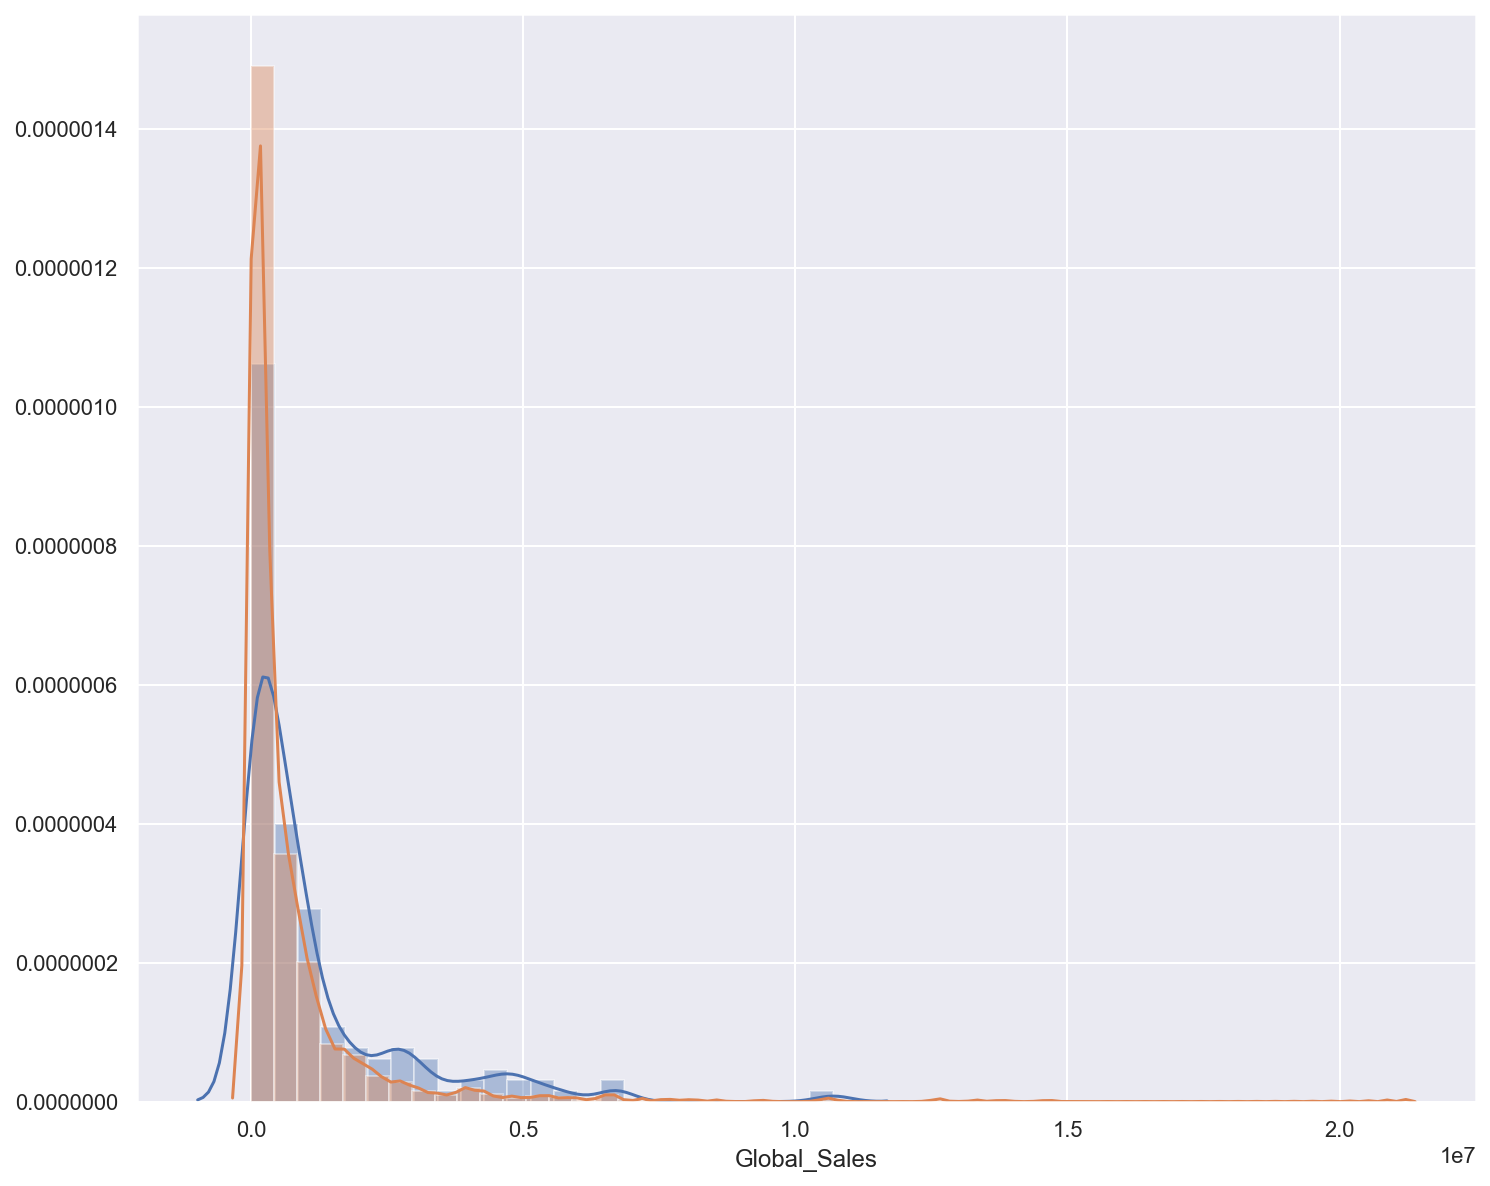

In [43]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(global_ps4) # Blue distribution
sns.distplot(global_non_ps4) # Green distribution

As you can see from the distribution it is postively skewed indicating a lot of outliers in the population data

##### Power Analysis to determine the sample size

The significance level for the experiment = 95%, alpha = 0.05(type 1 error) - preventing against false positives, power of the experiment is 0.8 and solving for various values of effect size

In [48]:
number_of_samples = []
for i in [0.2, 0.25, 0.3, 0.35, 0.40, 0.45, 0.50, 0.60, 0.70, 0.80]:
    number_of_samples.append(power.solve_power(effect_size= i, alpha=0.05, power=0.8))

"Number of samples =  {} when alpha is: {},and power is: {}".format(number_of_samples, 0.05, 0.8)

'Number of samples =  [393.4056989990335, 252.12750515434277, 175.38467227482232, 129.11207873406047, 99.08032683981143, 78.49161726401, 63.765611775409525, 44.58579025908018, 33.02456951586263, 25.52457250047935] when alpha is: 0.05,and power is: 0.8'

What this basically tells us for an effect size of 0.60 for example and power of 0.8, alpha value of 0.05. I need 44.585 samples approximately 45 samples.

Randomly selecting 100 samples from both population since we are short on data for both groups

In [52]:
ps4_exc_sample = random.sample(list(global_ps4), 100)
ps4_non_exc_sample = random.sample(list(global_non_ps4), 100)

In [58]:
print("The variance for ps4 exclusives: {}".format(np.var(ps4_exc_sample)))
print("The std for ps4 exclusives is: {}".format(np.std(ps4_exc_sample)))
print("The mean for ps4 exclusives is: {}".format(np.mean(ps4_exc_sample)))

print('===============')

print("The variance for non-ps4 exclusives is: {}".format(np.var(ps4_non_exc_sample)))
print("The std for non-ps4 exclusives is: {}".format(np.std(ps4_non_exc_sample)))
print("The mean for non-ps4 exclusives is: {}".format(np.mean(ps4_non_exc_sample)))

The variance for ps4 exclusives: 2875658760000.0
The std for ps4 exclusives is: 1695776.7423809066
The mean for ps4 exclusives is: 1138200.0
The variance for non-ps4 exclusives is: 1294905440000.0
The std for non-ps4 exclusives is: 1137939.1196368986
The mean for non-ps4 exclusives is: 668400.0


From the results above we can see that the sample sizes are of unequal variances which prompts the introduction of the welch's t-test as one of the underlying assumption of usinga 2 sample t-test is equal variances of the 2 samples.

##### Normality test for both samples 

In [60]:
stats.normaltest(ps4_exc_sample)

NormaltestResult(statistic=86.56007950328207, pvalue=1.5985181042788474e-19)

In [61]:
stats.normaltest(ps4_non_exc_sample)

NormaltestResult(statistic=90.96137188248541, pvalue=1.77006437970368e-20)

##### Plotting the distribution for both samples

/Users/yusufolodo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Probability')

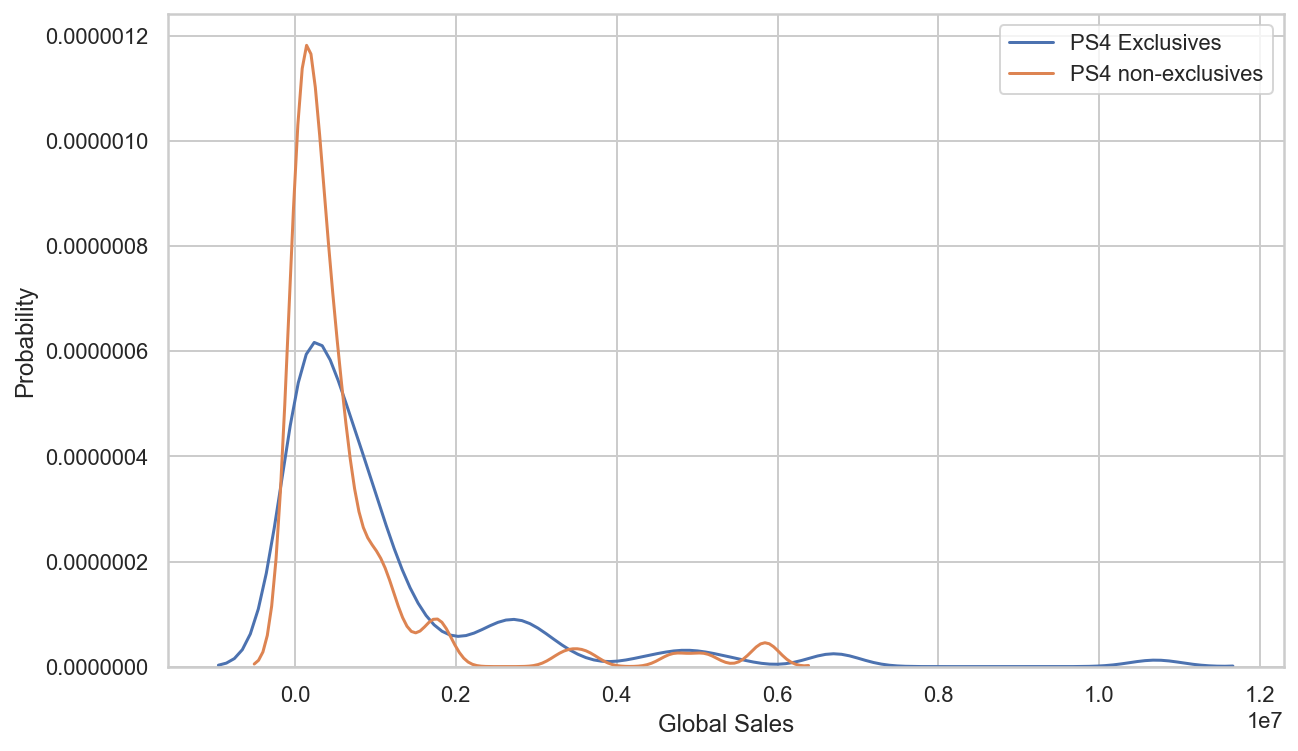

In [62]:
plt.figure(figsize=(10,6))
sns.distplot(ps4_exc_sample, label='PS4 Exclusives', hist= False)
sns.distplot(ps4_non_exc_sample, label='PS4 non-exclusives', hist=False)

plt.xlabel('Global Sales')
plt.ylabel('Probability')

##### difference between the distribution means

In [64]:
diff_means = np.mean(ps4_exc_sample) - np.mean(ps4_non_exc_sample)
print("The difference between means is {}".format(diff_means)) #difference between means is 469,800 global sales

The difference between means is 469800.0


In [65]:
def welch_t(a, b):#using welch t-test
    
    numerator = np.mean(a) - np.mean(b)
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(np.var(a, ddof=1)/np.array(a).size + np.var(b, ddof=1)/np.array(b).size)
    
    return np.abs(numerator/denominator)


In [68]:
welch_t_test = welch_t(ps4_exc_sample,ps4_non_exc_sample) # test statistic vlaue is 2.288
print("Welch t-statistic is {}".format(welch_t_test))


Welch t-statistic is 2.2889336523055666


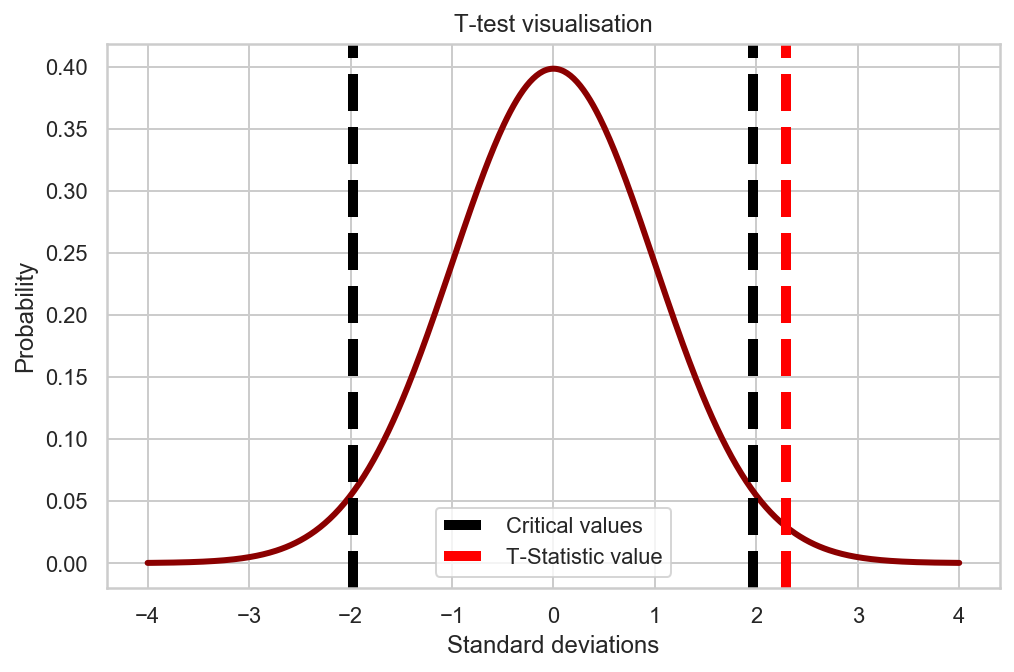

In [71]:
def visualize_t(t_stat, n_control, n_experimental):
    from matplotlib import pyplot as plt 

    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()

    xs = np.linspace(4, -4, 500)

    # use stats.t.ppf to get critical value. For alpha = 0.05 and two tailed test
    crit = stats.t.ppf(1-0.025, (n_control+n_experimental-2))
    
    # use stats.t.pdf to get values on the probability density function for the t-distribution
    
    ys= stats.t.pdf(xs, (n_control+n_experimental-2), 0, 1)
    ax.plot(xs, ys, linewidth=3, color='darkred')

    ax.axvline(crit, color='black', linestyle='--', lw=5, label='Critical values')
    ax.axvline(-crit, color='black', linestyle='--', lw=5)
    ax.axvline(t_stat, color='red', linestyle='--', lw=5, label="T-Statistic value")
    
    plt.title('T-test visualisation')
    plt.legend(loc='best')
    plt.xlabel('Standard deviations')
    plt.ylabel('Probability')
    plt.show()
    return None
n_ps4 = len(ps4_exc_sample)
n_non_ps4 = len(ps4_non_exc_sample)
t_stat = welch_t_test
visualize_t(t_stat, n_ps4, n_non_ps4)

In [74]:
stats.ttest_ind(ps4_exc_sample, ps4_non_exc_sample)

Ttest_indResult(statistic=2.2889336523055666, pvalue=0.023138379844973488)

Judging from the results above there is statistical significance between both groups as p_value is less than 0.05 with value of 0.02. and t-statistic of 2.28